In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
df = pd.read_csv('C:/Users/AKASH/Desktop/Stats ML/titanic/train.csv')

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


C:\Users\AKASH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


4.787316519674893

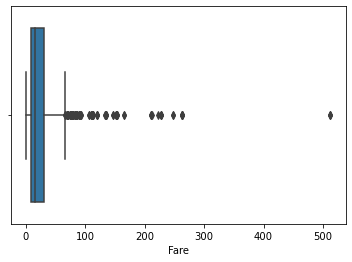

In [23]:
sns.boxplot(df['Fare'])
df['Fare'].skew() #skewness should ideally be in range of -1 to +1 but we can clearly see that's not the case

In [32]:
Q1 = df['Fare'].quantile(.25)
Q3 = df['Fare'].quantile(.75)
IQR = Q3-Q1
print('Q1:', Q1, ' Q3:', Q3, ' IQR:', IQR )

Q1: 7.9104  Q3: 31.0  IQR: 23.0896


In [42]:
lb = Q1 - 1.5*IQR
print('lb:',lb)
ub = Q3 + 1.5*IQR
print('ub:',ub)
fare_outliers =  df[(df['Fare']<lb) | (df['Fare']>ub)] 
fare_outliers_outliers

# Fare_outliers = df[ (df['Fare'] < Q1 - whisker_width*IQR) | (df['Fare'] > Q3 + whisker_width*IQR)   ]


lb: -26.724
ub: 65.6344


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S


In [44]:
# lower_whisker = Q1 -(whisker_width*IQR)
# upper_whisker = Q3 + whisker_width*IQR)


# df['Fare']=np.where(df['Fare']>upper_whisker,
#                     upper_whisker,
#                     np.where(df['Fare']<lower_whisker,lower_whisker,df['Fare'])
#                    )

32.2042079685746 49.693428597180905


In [45]:
#replacing the of outliers by ub and lower bound
#we can also replace it with median or mode

df['Fare'] = np.where(df['Fare']> ub,
                     ub,
                     np.where(df['Fare']<lb, lb, df['Fare']))



C:\Users\AKASH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

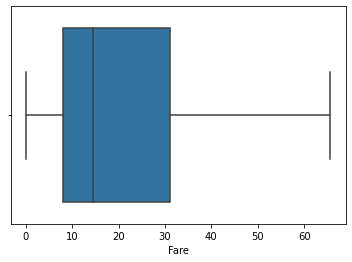

In [46]:
sns.boxplot(df['Fare'], data = df)

In [48]:
df['Fare'].shape

(891,)

In [51]:
## dropping rows where there is outliers

index=df['Fare'][(df['Fare']>ub)|(df['Fare']<lb)].index
df.drop(index,inplace=True)


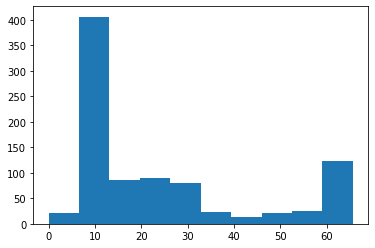

In [53]:
plt.hist(df['Fare'])
plt.show()